In [1]:
import numpy as np
from random import seed
from random import random
import statistics
import math
import matplotlib.pyplot as plt

# seed random number generator
seed(1)

# 1- Random Deposition

In [15]:
total_time_steps, length  = 1000, 1000;
height_surface = [0]*length 
average_heigth = [0]*total_time_steps
W = [0]*total_time_steps
logW = [0]*total_time_steps
logtime = [0]*total_time_steps

W_sum = 0
for time in range(1,total_time_steps):
    i = int(random()*length)
    height_surface[i] += 1
    average_heigth[time] = statistics.mean(height_surface)
    W_sum = 0
    for l in range(length):
        W_sum += (height_surface[l] - average_heigth[time])**2
    W[time] = math.sqrt(W_sum / length)
    logW[time] = math.log(W[time])
    logtime[time] = math.log(time)



## Plotting $W(L,t)$ over $L$ 


Text(0, 0.5, '$W(L,t)$')

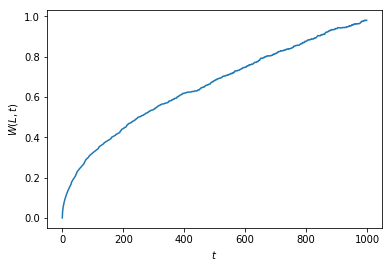

In [16]:
plt.plot(range(total_time_steps),W )
plt.xlabel("$t$")
plt.ylabel("$W(L,t)$")

Slope = 0.48951148419013846


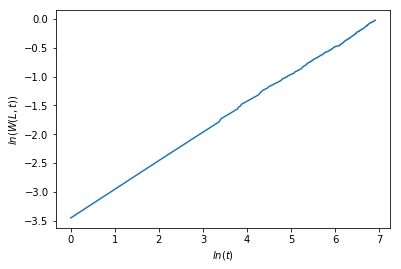

In [31]:
plt.plot(logtime[1:],logW[1:])
plt.xlabel("$ln(t)$")
plt.ylabel("$ln(W(L,t))$")
m ,b = np.polyfit(logtime[1:],logW[1:],1)
print("Slope = "+str(m))

In [32]:
%%latex


$ \beta = 0.4895 $

<IPython.core.display.Latex object>

# 2- Ballistic deposition model and Modified model algorithm

In [2]:
b_base = 0

def dynamic_roughness_modified(diff_vec):
    i = 0
    for dif in diff_vec[0:len(diff_vec)-100]:
        i += 1
        meanbunch = statistics.mean(diff_vec[i:i+20])
        #print (meanbunch)
        if abs(meanbunch) > 7*10**(-2):
            print(i)
            return i

def dynamic_roughness(diff_vec):
    i = 0
   # print(diff_vec)
    for dif in diff_vec:
        i += 1
        
        if abs(dif) > 3*10**(-2):
            #print (i)
            return i
        

def model(deposition_model,length,total_time_steps,tx,wx):
    height_surface = [0]*length 
    average_heigth = [0]*total_time_steps
    W = [0]*total_time_steps
    logW = [0]*total_time_steps
    logtime = [0]*total_time_steps
    global b_base
    #Random Deposition
    if (deposition_model == "Random"):
        W_sum = 0
        for time in range(1,total_time_steps):
            i = int(random()*length)
            height_surface[i] += 1
            average_heigth[time] = statistics.mean(height_surface)
            W_sum = 0
            for l in range(length):
                W_sum += (height_surface[l] - average_heigth[time])**2
            W[time] = math.sqrt(W_sum / length)
            logW[time] = math.log(W[time])
            logtime[time] = math.log(time)
        plt.plot(logtime[1:], logW[1:])
    #Ballistic Deposition
    elif (deposition_model == "Ballistic"):
        W_sum = 0
        for time in range(1,total_time_steps):
            #Updating Procedure
            i = int(random()*length)
            if (i == 0):
                a = length-1
                b = 0
                c = 1
            elif (i == length-1):
                a = i-1
                b = i
                c = 0
            elif( i != length):
                a = i-1
                b = i
                c = i+1
            
            temp_list = [height_surface[a],height_surface[b],height_surface[c]]
            if height_surface[a] < height_surface[b] and height_surface[c] < height_surface[b] and height_surface[a] == height_surface[c]:
                r = random()
                sel_index = math.floor(r-0.5) + math.ceil(r-0.5)
            else: 
                sel_index = np.argmin(np.array(temp_list))-1
            
            #print(i+sel_index)
            height_surface[(i+sel_index)%length] += 1
            
            average_heigth[time] = statistics.mean(height_surface)
            W_sum = 0
            for l in range(length):
                W_sum += (height_surface[l] - average_heigth[time])**2
                
            W[time] = math.sqrt(W_sum / length)
           # print(W[time])
            logW[time] = math.log(W[time])
            logtime[time] = math.log(time)
        
        fitplottime = np.array(logtime)
        fitplotW = np.array(logW)
        #plt.loglog(range(1,total_time_steps),W[1:]) #basex=np.e, basey=np.e)
        m, b = np.polyfit(fitplottime[1:10**2], fitplotW[1:10**2], 1)
        if length == 1000:
            b_base = b 
        plt.plot(logtime[1:], logW[1:]-b+b_base , label = "L = " + str(length))
        plt.plot(fitplottime[1:10**3], m*fitplottime[1:10**3]+b_base)

        #plt.plot(range(1,total_time_steps), logW[1:])
        print("slope of length = "+str(length)+" is = "+ str(m))
        #print((m*fitplottime[1:10**3] + b - logW[1:10**3]))#/abs(m*fitplottime[1:10**3] + b))
        txwx_index = dynamic_roughness(m*fitplottime[1:10**3] - logW[1:10**3] + b)
        #print(logW[txwx_index]-b+b_base)
        plt.plot(fitplottime[1:10**3],np.array([fitplotW[txwx_index]-b+b_base]*(10**3-1)))
        tx.append(fitplottime[txwx_index])
        wx.append(fitplotW[txwx_index]-b+b_base)
    #NNModified
    elif (deposition_model == "NNModified"):
            for time in range(1,total_time_steps):
                #Updating Procedure
                i = int(random()*length)%length
                if (i != 0 and i != length-1):
                    if(height_surface[i] >= height_surface[i-1] and height_surface[i] >= height_surface[i+1]):
                        height_surface[i] += 1
                    elif(height_surface[i-1] >= height_surface[i+1]):
                        height_surface[i] += (height_surface[i-1]-height_surface[i])
                    elif(height_surface[i-1] < height_surface[i+1]):
                        height_surface[i] += (height_surface[i+1]-height_surface[i])
                        
                elif(i == 0):
                    if(height_surface[i] < height_surface[i+1]):
                        height_surface[i] += (height_surface[i+1]-height_surface[i])
                    else:
                        height_surface[i] += 1
                elif(i == length-1):
                    if(height_surface[i] < height_surface[i-1]):
                        height_surface[i] += (height_surface[i-1]-height_surface[i])
                    else:
                        height_surface[i] += 1

                average_heigth[time] = statistics.mean(height_surface)
                W_sum = 0
                for l in range(length):
                    W_sum += (height_surface[l] - average_heigth[time])**2
                
                W[time] = math.sqrt(W_sum / length)
               # print(W[time])
                logW[time] = math.log(W[time])
                logtime[time] = math.log(time)

            fitplottime = np.array(logtime)
            fitplotW = np.array(logW)
            #plt.loglog(range(1,total_time_steps),W[1:]) #basex=np.e, basey=np.e)
            m, b = np.polyfit(fitplottime[1:10**2], fitplotW[1:10**2], 1)
            if length == 1000:
                b_base = b 
            plt.plot(logtime[1:], logW[1:]-b+b_base , label = "L = " + str(length))
            plt.plot(fitplottime[1:10**3], m*fitplottime[1:10**3]+b_base)

            #plt.plot(range(1,total_time_steps), logW[1:])
            print(m,b)
            #print((m*fitplottime[1:10**3] + b - logW[1:10**3]))#/abs(m*fitplottime[1:10**3] + b))
            txwx_index = dynamic_roughness_modified(m*fitplottime[1:10**3] - logW[1:10**3] + b)
            print(logW[txwx_index]-b+b_base)
            plt.plot(fitplottime[1:10**3],np.array([fitplotW[txwx_index]-b+b_base]*(10**3-1)))
            tx.append(fitplottime[txwx_index])
            wx.append(fitplotW[txwx_index]-b+b_base)

            
#model("Ballistic",1000,1000)

### 2-1- Running Ballistic deposition over different lengths 

slope of length = 1000 is = 0.48546767350243386
slope of length = 2000 is = 0.49290357794477246
slope of length = 3000 is = 0.4953053098485592
slope of length = 4000 is = 0.49649238356820075
slope of length = 5000 is = 0.49720029034510743
slope of length = 6000 is = 0.49767043814822604


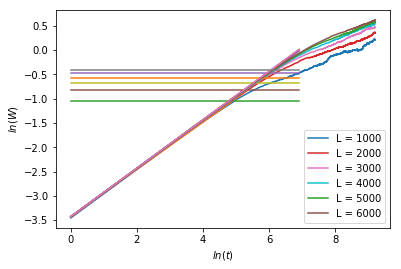

In [3]:

L = [1000,2000,3000,4000,5000,6000]
tx = []
wx = []
model("Ballistic",L[0],10000,tx,wx)
model("Ballistic",L[1],10000,tx,wx)
model("Ballistic",L[2],10000,tx,wx)
model("Ballistic",L[3],10000,tx,wx)
model("Ballistic",L[4],10000,tx,wx)
model("Ballistic",L[5],10000,tx,wx)
plt.legend(loc = "lower right")
plt.xlabel("$ln(t)$")
plt.ylabel("$ln(W)$")


log = lambda t: math.log(t)
logL = np.array([log(Li) for Li in L])
#model("Ballistic",10000,10000)


In [47]:
%%latex
For example : $\beta(L = 6000) =  0.4976704381482258$ 

<IPython.core.display.Latex object>

## 2-2- Plot $ln(W_x)$ over $ln(L)$

alpha = 0.372527060165338


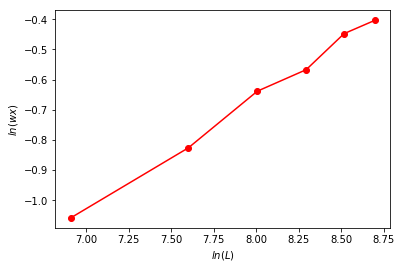

In [58]:
plt.plot(logL,wx,"ro-")
plt.xlabel("$ln(t)$")
plt.ylabel("$ln(wx)$")

mw, bw = np.polyfit(logL, wx, 1)
print("alpha = "+str(mw))



In [61]:
%%latex

$ \alpha = 0.372527060165338$

<IPython.core.display.Latex object>

## 2-3- Plot $ln(t_x)$ over $ln(L)$

z = 0.6813801871084826


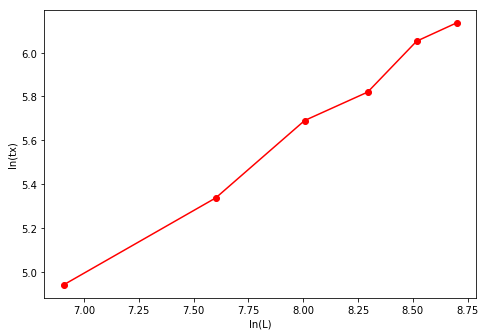

In [59]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.plot(logL,tx,"ro-")
ax.set_xlabel("ln(L)")
ax.set_ylabel("ln(tx)")

mx, bx = np.polyfit(logL, tx, 1)
print("z = "+str(mx))


In [60]:
%%latex

$ z = 0.6813801871084826 $

<IPython.core.display.Latex object>

## Checking the equality $\alpha = \beta * z$ 
 
In our case $ \beta = 0.4976704381482258 $ , $\alpha = 0.372527060165338 $ and $z = 0.6813801871084826 $.
$\alpha$ is caculated around $ 0.34$ that is approximatly in accordance with the given by the theory. 




## 3-1- Running Modified model over different lengths

0.5088369001925869 -2.3449083873955114
108
-1.1197949369390847
0.4981580852025651 -2.6736892967733032
97
-1.1697504784522095
0.5086782635476245 -2.8990188155212846
219
-0.6903735581772024
0.4905016177267963 -2.979216759302929
137
-1.0297800116663014


Text(0, 0.5, '$ln(W)$')

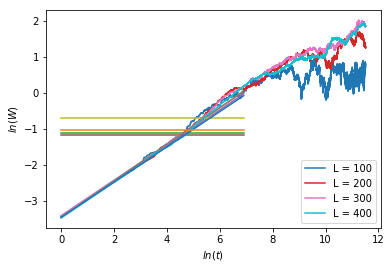

In [102]:
L = [100,200,300,400]

tx = []
wx = []
model("NNModified",L[0],100000,tx,wx)
model("NNModified",L[1],100000,tx,wx)
model("NNModified",L[2],100000,tx,wx)
model("NNModified",L[3],100000,tx,wx)
#model("NNModified",L[4],10000,tx,wx)
#model("NNModified",L[5],10000,tx,wx)
plt.legend(loc = "lower right")
plt.xlabel("$ln(t)$")
plt.ylabel("$ln(W)$")

## 3-2- Plot $ln(W_x)$ over $ln(L)$

alpha = 0.17424659169691503


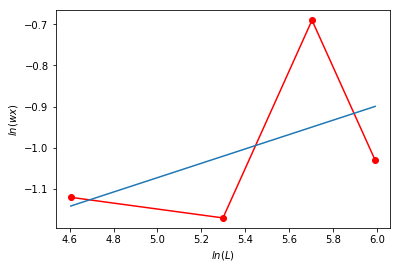

In [111]:
log = lambda t: math.log(t)
logL = np.array([log(Li) for Li in L])

plt.plot(logL,wx,"ro-")
plt.xlabel("$ln(L)$")
plt.ylabel("$ln(wx)$")

mw, bw = np.polyfit(logL, wx, 1)

plt.plot(logL,mw*logL+bw)
print("alpha = "+str(mw))

## 3-3- Plot $ln(t_x)$ over $ln(L)$

z = 0.33814881660295326 3.0655770812128216


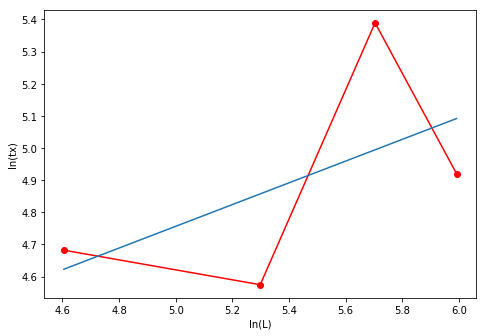

In [110]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.plot(logL,tx,"ro-")
ax.set_xlabel("ln(L)")
ax.set_ylabel("ln(tx)")

mx, bx = np.polyfit(logL, tx, 1)
ax.plot(logL,mx*logL+bx)
print("z = "+str(mx) , bx)

## Checking the equality $\alpha = \beta * z$ 
 
In our case $ \beta = 0.4905016177267963 $ , $\alpha = 0.17424659169691503 $ and $z = 0.33814881660295326 $.
$\alpha$ is caculated around $ 0.16$ that is approximatly in accordance with the given by the theory. 


